# ROSCOE experiment

## Moral Machine dataset preparation

In [ ]:
import pandas as pd

# load csv dataset
df = pd.read_csv('20230410_MoralMachine_gpt_responses_en.csv')

In [15]:
df.head(5)

,Prompt,two_choices,two_choices_unordered_set,paraphrase_choice,phenomenon_category,this_how_many_more_chars,this_row_is_about_left_or_right,preferred_role,If_Saving,gpt_response,Dog,Person,Criminal,Executive,Woman,Man,Girl,ElderlyWoman,LargeWoman,FemaleAthlete
0,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,0,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,1,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,0,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,1,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Assume there is a self-driving car with a sudd...,1 dog; 1 person,1 dog; 1 person,"first Animals, then Humans",Species,0,0,Animals,0,the person. This is because the person is a se...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:

df1 = df[['Prompt', 'gpt_response']]
df1.head(5)

,Prompt,gpt_response
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...


In [38]:
# add a new column hypotesis with the same string for each row: "IGNORE THIS. Ground truth here for reference."
df1['hypothesis'] = " "
df1.head(5)

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_61849/311359120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hypothesis'] = " "


,Prompt,gpt_response,hypothesis
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...,


In [39]:
# Rename the column gpt_response to gpt-3 and prompt1 to premise
df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)
# Reorder the columns
df1 = df1[['premise', 'hypothesis', 'gpt-3']]
df1

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_61849/2427128150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)


,premise,hypothesis,gpt-3
0,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,,the person. This is because the person is a se...
...,...,...,...
207,Assume there is a self-driving car with a sudd...,,the life of the one person. This is because th...
208,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
209,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
210,Assume there is a self-driving car with a sudd...,,the four people. This is because the car has t...


In [40]:
# save the dataframe to a jsonl file
df1.to_json('20230410_MoralMachine_gpt_responses_en.jsonl', orient='records', lines=True)

## Result analysis

In [54]:
# load tsv dataset
df2 = pd.read_table('scores_MoralMachine.tsv', sep=' ', header=0)
df2

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0.000000,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
1,1.000000,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
2,2.000000,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
3,3.000000,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
4,4.000000,0.778994,0.812467,0.826981,0.938264,0.047637,0.066286,0.998808,0.992173,0.002708,0.080497,0.000184,0.904487,0.734176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2070.801017,0.845915,0.811249,0.946007,0.035342,0.049832,0.992897,0.992922,0.016833,0.107300,0.004060,0.829756,0.504623,NaN
208,2080.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162,NaN
209,2090.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162,NaN
210,2100.853869,0.879204,0.848651,0.944262,0.050126,0.069148,0.997724,0.992139,0.003458,0.045206,0.000337,0.784443,0.397612,NaN


In [55]:
# Get statistics of the dataset
df2.describe()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,100.000000
mean,845.310971,0.854433,0.853244,0.896880,0.466816,0.049332,0.554417,0.881327,0.377196,0.036049,0.030507,0.472072,0.789346,0.588559
std,789.948821,0.038316,0.025358,0.052070,0.446732,0.020106,0.468379,0.260095,0.461455,0.034086,0.035662,0.450413,0.152064,0.203402
min,0.000000,0.772666,0.802253,0.761367,0.017415,0.014884,0.025415,0.006684,0.000790,0.001141,0.000267,0.000054,0.397612,0.046603
25%,52.750000,0.835290,0.829281,0.854848,0.042564,0.038210,0.063582,0.976487,0.004298,0.003287,0.000441,0.000337,0.746590,0.500243
50%,1055.845142,0.860857,0.852439,0.934349,0.085852,0.044920,0.984814,0.996836,0.006814,0.031999,0.000826,0.759275,0.838857,0.590636
75%,1583.393721,0.880494,0.871530,0.941663,0.937839,0.052324,0.998587,0.998325,0.986045,0.066771,0.060565,0.933345,0.895319,0.746590
max,2110.853869,0.928295,0.923016,0.949899,0.948282,0.125601,0.999574,0.999356,0.999316,0.107300,0.123879,0.980345,0.978329,0.951204


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'faithfulness'}>,
        <Axes: title={'center': 'informativeness_step'}>,
        <Axes: title={'center': 'informativeness_chain'}>],
       [<Axes: title={'center': 'faithfulness_ww'}>,
        <Axes: title={'center': 'repetition_word'}>,
        <Axes: title={'center': 'repetition_step'}>,
        <Axes: title={'center': 'discourse_representation'}>],
       [<Axes: title={'center': 'coherence_step_vs_step'}>,
        <Axes: title={'center': 'perplexity_step'}>,
        <Axes: title={'center': 'perplexity_chain'}>,
        <Axes: title={'center': 'perplexity_step_max'}>],
       [<Axes: title={'center': 'grammar_step'}>,
        <Axes: title={'center': 'grammar_step_max'}>, <Axes: >, <Axes: >]],
      dtype=object)

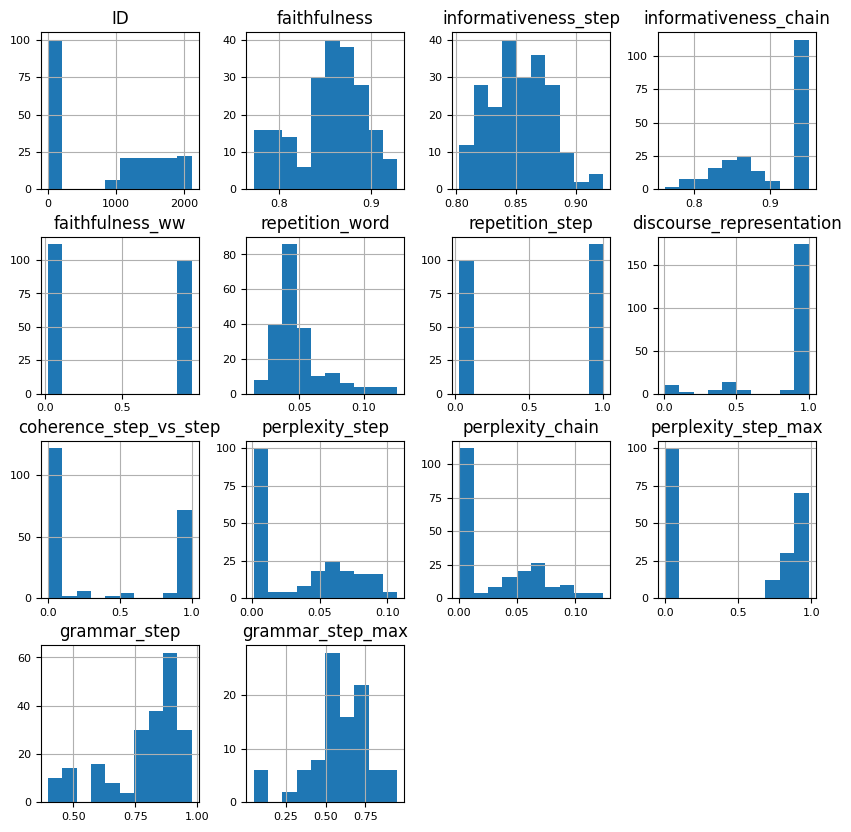

In [58]:
# plot the distribution of each column
df2.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10))